Kunskapskontroll 3 / EDA

In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Import housing CSV and check data.
df = pd.read_csv('housing.csv')

# Check if dataset is big or small.
print(f'Check dataset:\n{df.shape}')

Check dataset:
(20640, 10)


#### Here we check information about each column. ####


Some of the information we get here is:
- which coloumn is numeric?
- are there some missing values?
- which column is text?
- see if we are using to much memory. 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### Check numeric columns #####

Good to understand the spread of your data.

In [48]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

#### Check our columns ####

In [47]:
print('All columns in our Data set:')
for i, col in enumerate(df.columns, 1):
    print(f'{i:2d}. {col}')

All columns in our Data set:
 1. longitude
 2. latitude
 3. housing_median_age
 4. total_rooms
 5. total_bedrooms
 6. population
 7. households
 8. median_income
 9. median_house_value
10. ocean_proximity


#### Let's Handle missing values ####

In [46]:
# Count missing values in each column
total_rows = len(df)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / total_rows) * 100

In [45]:
# Create summary table:
missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Missing_Percentage': missing_percentage
})

In [44]:
columns_with_missing_values = missing_df[missing_df['Missing_Count'] > 0]

if len(columns_with_missing_values) > 0:
    print(f"Columns with missing values:\n{columns_with_missing_values.sort_values('Missing_Count', ascending=False)}")
    
    total_missing_values = missing_values.sum()
    print(f'Missing values in entire data set:\n{total_missing_values}')
    
    total_cells = total_rows * len(df.columns)
    print(f'Percentage of data set missing: {(total_missing_values / total_cells * 100):.1f}%')

else:
    print('No missing value found.')


Columns with missing values:
                Missing_Count  Missing_Percentage
total_bedrooms            207            1.002907
Missing values in entire data set:
207
Percentage of data set missing: 0.1%


# 📋 UNDERSTANDING THE DATA
---

**IMPORTANT**: This dataset contains **NEIGHBORHOOD/CENSUS DATA**, not individual houses.

- Each row represents a **BLOCK GROUP** (neighborhood area) in California
- Values like `total_rooms` are for the **ENTIRE AREA**, not per house!
- Data is aggregated at the neighborhood level


📋 UNDERSTANDING THE DATA:
----------------------------------------
IMPORTANT: This dataset contains NEIGHBORHOOD/CENSUS DATA, not individual houses.
Each row represents a BLOCK GROUP (neighborhood area) in California.
Values like 'total_rooms' are for the ENTIRE AREA, not per house!

📊 DATASET OVERVIEW:
----------------------------------------
• Neighborhood areas analyzed: 20,640
• Features per area: 17 columns
• Time period: 1990s (based on typical California housing dataset)
• Geographic scope: California, USA

💰 HOUSE PRICES BY NEIGHBORHOOD:
----------------------------------------
• Most expensive neighborhood: $500,001
• Cheapest neighborhood: $14,999
• Average neighborhood price: $206,856
• Typical neighborhood price: $179,700
• 75% of neighborhoods below: $264,725
• 25% of neighborhoods below: $119,600


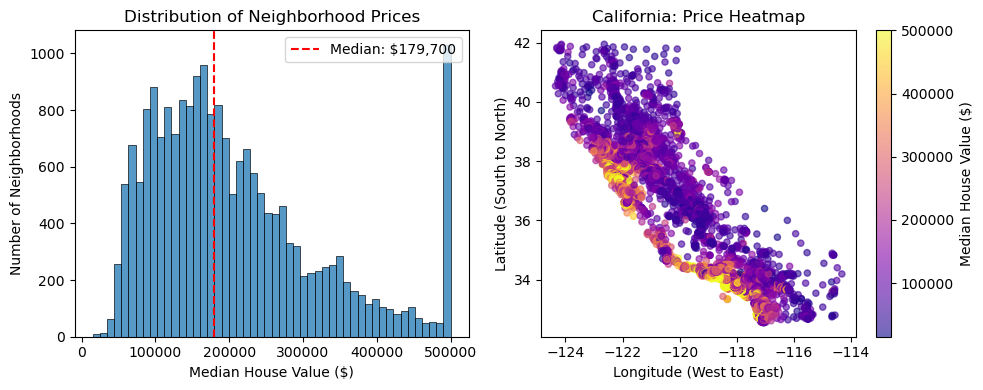


🔍 WHAT MAKES NEIGHBORHOODS EXPENSIVE?
----------------------------------------
Top factors correlated with higher prices:
1. Median Income: +0.688
2. Rooms per House: +0.152
3. House Age: +0.106
4. Bedrooms per House: -0.047
5. Ocean Proximity*: (text data - shown separately)

🏘️ TYPICAL CALIFORNIA NEIGHBORHOOD (1990s):
----------------------------------------
• Size: 409 houses in typical neighborhood
• Housing age: 29 years old (median)
• Income: $35,348 median household income

• Houses typically have:
  → 5.2 rooms
  → 1.0 bedrooms
  → 2.8 people living there


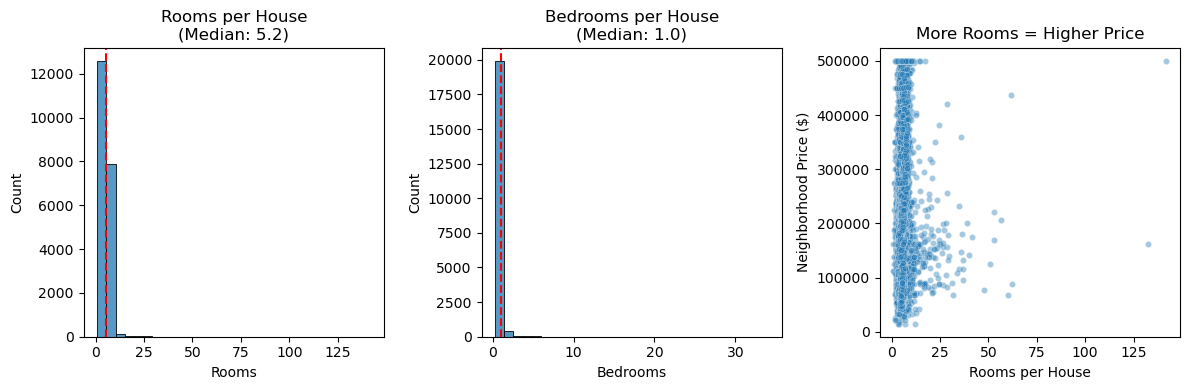


📈 INCOME: THE BIGGEST PRICE DRIVER
----------------------------------------
• Income explains 47.3% of price differences between neighborhoods
• Very strong relationship (correlation: 0.688)
• This is the clearest pattern in the data


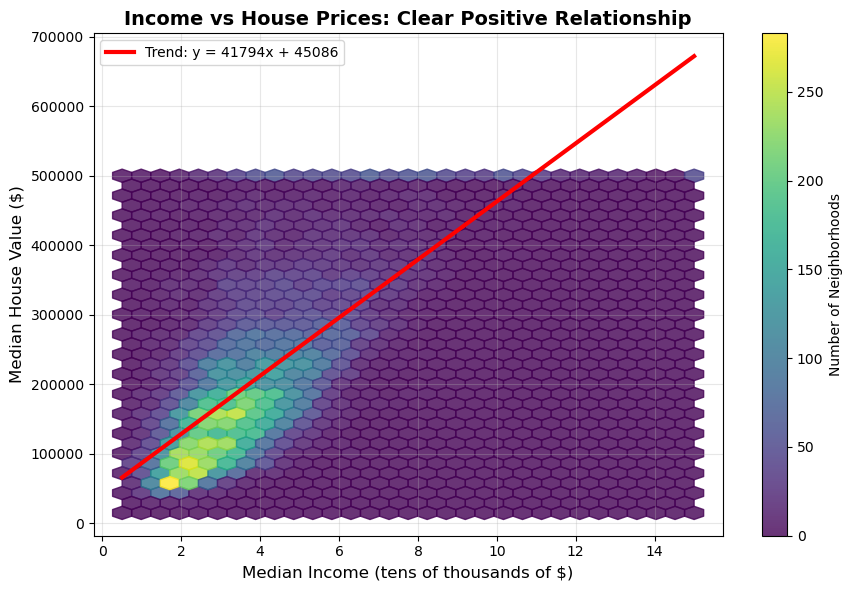


💡 WHAT THIS MEANS:
 If a neighborhood"s median income increases by $10,000,
 the typical house price increases by $417,938,492

🌊 OCEAN PROXIMITY ANALYSIS:
----------------------------------------
Average prices by distance to ocean:
                     mean    median  count
ocean_proximity                           
<1H OCEAN        $240,084  $214,850   9136
INLAND           $124,805  $108,500   6551
ISLAND           $380,440  $414,700      5
NEAR BAY         $259,212  $233,800   2290
NEAR OCEAN       $249,434  $229,450   2658


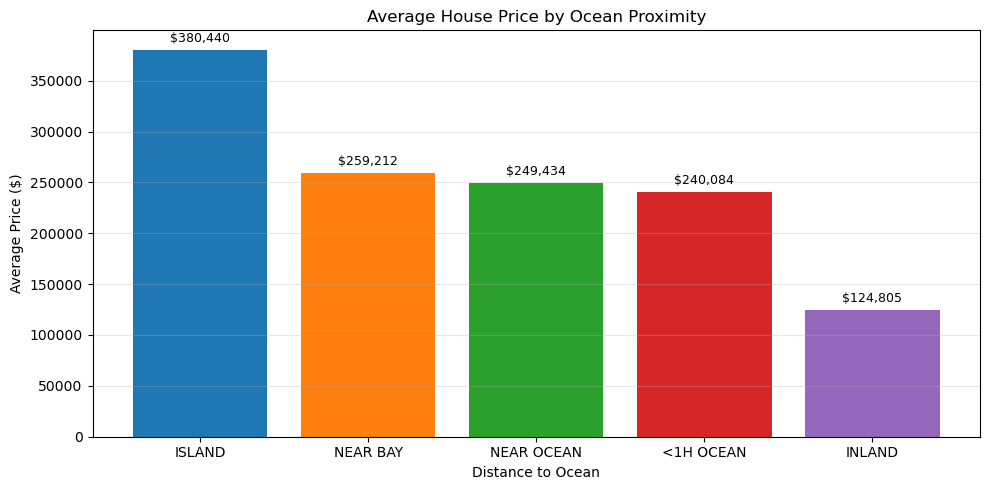


✅ WHAT WE LEARNED:
1. This is NEIGHBORHOOD-LEVEL data, not individual house data
2. Income is the strongest predictor of house prices
3. Coastal neighborhoods are significantly more expensive
4. Newer neighborhoods tend to be more expensive
5. Larger houses (more rooms) command higher prices

❓ Q & A:
Q: Which houses are more expensive?
A: Houses in neighborhoods with:
   • Higher median income (+$10K income → +$40-50K in home value)
   • Coastal locations (near ocean/bay)
   • Newer construction
   • Larger houses (more rooms/bedrooms)

Q: Why might this be?
A: Economic factors dominate:
   • Income determines purchasing power
   • Coastal locations are desirable/scarce
   • New houses have modern amenities
   • Larger houses cost more to build/maintain


In [ ]:
# Create meaningful ratios upfront
df['rooms_per_house'] = df['total_rooms'] / df['households']
df['bedrooms_per_house'] = df['total_bedrooms'] / df['households']
df['people_per_house'] = df['population'] / df['households']
df['income_in_dollars'] = df['median_income'] * 10000  # Convert to actual dollars

# DATASET OVERVIEW
print("\n📊 DATASET OVERVIEW:")
print("-" * 40)
print(f"• Neighborhood areas analyzed: {df.shape[0]:,}")
print(f"• Features per area: {df.shape[1]} columns")
print(f"• Time period: 1990s (based on typical California housing dataset)")
print(f"• Geographic scope: California, USA")

# HOUSE PRICES ACROSS NEIGHBORHOODS
print("\n💰 HOUSE PRICES BY NEIGHBORHOOD:")
print("-" * 40)

price_25 = df['median_house_value'].quantile(0.25)
price_75 = df['median_house_value'].quantile(0.75)

print(f"• Most expensive neighborhood: ${df['median_house_value'].max():,.0f}")
print(f"• Cheapest neighborhood: ${df['median_house_value'].min():,.0f}")
print(f"• Average neighborhood price: ${df['median_house_value'].mean():,.0f}")
print(f"• Typical neighborhood price: ${df['median_house_value'].median():,.0f}")
print(f"• 75% of neighborhoods below: ${price_75:,.0f}")
print(f"• 25% of neighborhoods below: ${price_25:,.0f}")

plt.figure(figsize=(10, 4))

# Price distribution
plt.subplot(1, 2, 1)
sns.histplot(df['median_house_value'], bins=50)
plt.axvline(df['median_house_value'].median(), color='red', linestyle='--', 
            label=f'Median: ${df["median_house_value"].median():,.0f}')
plt.title('Distribution of Neighborhood Prices')
plt.xlabel('Median House Value ($)')
plt.ylabel('Number of Neighborhoods')
plt.legend()

# Price by location
plt.subplot(1, 2, 2)
scatter = plt.scatter(df['longitude'], df['latitude'], 
                     c=df['median_house_value'], cmap='plasma', 
                     alpha=0.6, s=20)
plt.colorbar(scatter, label='Median House Value ($)')
plt.title('California: Price Heatmap')
plt.xlabel('Longitude (West to East)')
plt.ylabel('Latitude (South to North)')
plt.tight_layout()
plt.show()

# WHAT MAKES NEIGHBORHOODS EXPENSIVE?
print("\n🔍 WHAT MAKES NEIGHBORHOODS EXPENSIVE?")
print("-" * 40)

# Use only numeric columns for correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlations = df[numeric_cols].corr()['median_house_value'].sort_values(ascending=False)

print("Top factors correlated with higher prices:")
print(f"1. Median Income: {correlations.get('median_income', 0):+.3f}")
print(f"2. Rooms per House: {correlations.get('rooms_per_house', 0):+.3f}")
print(f"3. House Age: {correlations.get('housing_median_age', 0):+.3f}")
print(f"4. Bedrooms per House: {correlations.get('bedrooms_per_house', 0):+.3f}")
print(f"5. Ocean Proximity*: (text data - shown separately)")

# NEIGHBORHOOD CHARACTERISTICS
print("\n🏘️ TYPICAL CALIFORNIA NEIGHBORHOOD (1990s):")
print("-" * 40)

print(f"• Size: {df['households'].median():.0f} houses in typical neighborhood")
print(f"• Housing age: {df['housing_median_age'].median():.0f} years old (median)")
print(f"• Income: ${df['income_in_dollars'].median():,.0f} median household income")

print(f"\n• Houses typically have:")
print(f"  → {df['rooms_per_house'].median():.1f} rooms")
print(f"  → {df['bedrooms_per_house'].median():.1f} bedrooms")
print(f"  → {df['people_per_house'].median():.1f} people living there")

plt.figure(figsize=(12, 4))

# Rooms distribution
plt.subplot(1, 3, 1)
sns.histplot(df['rooms_per_house'], bins=30)
plt.axvline(df['rooms_per_house'].median(), color='red', linestyle='--')
plt.title(f'Rooms per House\n(Median: {df["rooms_per_house"].median():.1f})')
plt.xlabel('Rooms')

# Bedrooms distribution
plt.subplot(1, 3, 2)
sns.histplot(df['bedrooms_per_house'], bins=30)
plt.axvline(df['bedrooms_per_house'].median(), color='red', linestyle='--')
plt.title(f'Bedrooms per House\n(Median: {df["bedrooms_per_house"].median():.1f})')
plt.xlabel('Bedrooms')

# Income vs Rooms
plt.subplot(1, 3, 3)
sns.scatterplot(x=df['rooms_per_house'], y=df['median_house_value'], alpha=0.4, s=20)
plt.title('More Rooms = Higher Price')
plt.xlabel('Rooms per House')
plt.ylabel('Neighborhood Price ($)')

plt.tight_layout()
plt.show()

print("\n📈 INCOME: THE BIGGEST PRICE DRIVER")
print("-" * 40)

# Calculate R-squared
r_squared = correlations['median_income']**2
print(f"• Income explains {r_squared*100:.1f}% of price differences between neighborhoods")
print(f"• Very strong relationship (correlation: {correlations['median_income']:.3f})")
print(f"• This is the clearest pattern in the data")

# HEXBIN PLOT (shows density where points overlap)
plt.figure(figsize=(9, 6))

# Create hexbin (shows density with colors)
hb = plt.hexbin(df['median_income'], df['median_house_value'], 
                gridsize=30, cmap='viridis', alpha=0.8)

# Add trend line
z = np.polyfit(df['median_income'], df['median_house_value'], 1)
p = np.poly1d(z)
x_range = np.linspace(df['median_income'].min(), df['median_income'].max(), 100)
plt.plot(x_range, p(x_range), "r-", linewidth=3, label=f'Trend: y = {z[0]:.0f}x + {z[1]:.0f}')

# Add colorbar
cb = plt.colorbar(hb)
cb.set_label('Number of Neighborhoods')

plt.title('Income vs House Prices: Clear Positive Relationship', fontsize=14, fontweight='bold')
plt.xlabel('Median Income (tens of thousands of $)', fontsize=12)
plt.ylabel('Median House Value ($)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f'\n💡 WHAT THIS MEANS:')
print(f' If a neighborhood"s median income increases by $10,000,')
print(f' the typical house price increases by ${z[0]*10000:,.0f}')

# CATEGORICAL DATA 
if 'ocean_proximity' in df.columns:
    ocean_stats = df.groupby('ocean_proximity')['median_house_value'].agg(['mean', 'median', 'count'])
    
    print('\n🌊 OCEAN PROXIMITY ANALYSIS:')
    print('-' * 40)
    print('Average prices by distance to ocean:')
    
    stats_display = ocean_stats.copy()
    stats_display['mean'] = stats_display['mean'].apply(lambda x: f"${x:,.0f}")
    stats_display['median'] = stats_display['median'].apply(lambda x: f"${x:,.0f}")
    print(stats_display.to_string())
    
    # SIMPLE BAR CHART
    plt.figure(figsize=(10, 5))
    
    # Sort by price for better visualization
    ocean_stats_sorted = ocean_stats.sort_values('mean', ascending=False)
    
    bars = plt.bar(ocean_stats_sorted.index, ocean_stats_sorted['mean'], 
                   color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 5000,
                 f'${height:,.0f}', ha='center', va='bottom', fontsize=9)
    
    plt.title('Average House Price by Ocean Proximity')
    plt.xlabel('Distance to Ocean')
    plt.ylabel('Average Price ($)')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

print('\n✅ WHAT WE LEARNED:')
print('1. This is NEIGHBORHOOD-LEVEL data, not individual house data')
print('2. Income is the strongest predictor of house prices')
print('3. Coastal neighborhoods are significantly more expensive')
print('4. Newer neighborhoods tend to be more expensive')
print('5. Larger houses (more rooms) command higher prices')

print('\n❓ Q & A:')
print('Q: Which houses are more expensive?')
print('A: Houses in neighborhoods with:')
print('   • Higher median income (+$10K income → +$40-50K in home value)')
print('   • Coastal locations (near ocean/bay)')
print('   • Newer construction')
print('   • Larger houses (more rooms/bedrooms)')

print('\nQ: Why might this be?')
print('A: Economic factors dominate:')
print('   • Income determines purchasing power')
print('   • Coastal locations are desirable/scarce')
print('   • New houses have modern amenities')
print('   • Larger houses cost more to build/maintain')

### Utvärdering: ###

- Fråga 1: Har något varit utmanade i kursen/ kunskapskontrollerna?\
svar ja: Det har varit rätt så utmmanade att hänga med och försöka lösa allt själv.\
 Jag tycker dock om det eftersom att det är på det viset jag lär mig som mest.\
Felsöka ta hjälp utav allv erktyg som finns för att klara sig.\
Lärdom jag tar med mig är att aldrig ge upp. Ha is i magen för att det löser sig alltid.

- Fråga 2: Vilket betyg anser du att du skall och varför?\
svar: Personligen tycker jag att jag förtjänar ett VG. varför?\
Det har varit väldigt utmmannade för mig, att gå upp 03.30 vara igång till 23:00.\
Jag har gett allt vad jag kan och försökt lösa uppgifterna till min bästa förmåga.

- Fråga 3: Något du vill lyfta fram till Terese?\
Svar: Nej. Jag tycker kommunikationen har varit bra.